In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
import copy
pd.set_option('display.max_columns', None)

In [2]:
avg_df = pd.read_csv('players_train_df.csv')
worlds_test = pd.read_csv('players_worlds_test.csv')

In [3]:
worlds_test.drop('Unnamed: 0', axis = 1, inplace = True)
avg_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
avg_df.drop(['team', 'opp_team'], axis = 1, inplace = True)
worlds_test.drop(['team', 'opp_team'], axis = 1, inplace = True)

In [5]:
columns = avg_df.columns.tolist()

In [6]:
columns.index('result'), columns.index('opp_result'), columns.index('result.1')

(1, 278, 554)

In [7]:
columns[1], columns[278], columns[554] = 'winrate', 'opp_winrate', 'result'
columns[1], columns[278], columns[554]

('winrate', 'opp_winrate', 'result')

In [8]:
avg_df.columns = columns
worlds_test.columns = columns

### Entrenando el modelo con el nuevo conjunto de datos

In [9]:
X = copy.copy(avg_df)

In [10]:
Y = avg_df['result']
X.drop('result', axis = 1, inplace = True)

In [11]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state = 43)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 43)
clf.fit(Xtrain, Ytrain)

ExtraTreesClassifier(random_state=43)

In [12]:
Ypred = clf.predict(Xtest)
metrics.f1_score(Ytest, Ypred, average='macro')

0.6264587155963304

### Extraccion de atributos importantes

<AxesSubplot:>

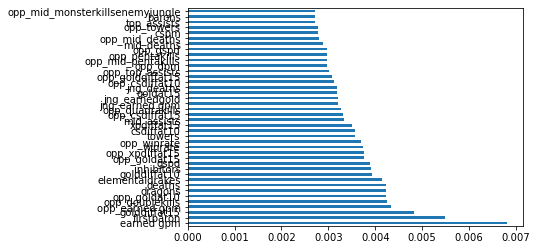

In [14]:
feat_importances = pd.Series(clf.feature_importances_, index = X.columns)
feat_importances.nlargest(40).plot(kind = 'barh')

In [15]:
feat_importances.sort_values(ascending = False, inplace = True)
f_i_l = feat_importances.tolist()
f_i_l_n = list(feat_importances.index)
feat_importance_list = [[f_i_l_n[i], f_i_l[i]] for i in range(len(f_i_l)) if i < 40]
feature_list = [x[0] for x in feat_importance_list]

### entrenamiento con los 40 atributos mas importantes

In [16]:
X = avg_df[feature_list]
Y = avg_df['result']

In [17]:
clf_importance = ExtraTreesClassifier(n_estimators = 100, random_state = 43)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 43)
clf_importance.fit(Xtrain, Ytrain)

ExtraTreesClassifier(random_state=43)

In [18]:
Ypred = clf_importance.predict(Xtest)
metrics.f1_score(Ytest, Ypred, average='macro')

0.6360959405179831

### prediccion en tiempo real

In [19]:
Xtest = worlds_test[feature_list]
Ytest = worlds_test['result']

In [20]:
Ypred = clf_importance.predict(Xtest)
metrics.f1_score(Ytest, Ypred, average = 'macro')

0.24675324675324675

In [21]:
metrics.accuracy_score(Ytest, Ypred)

0.41911764705882354

In [22]:
Ypred

array([ 1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,
        1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,
        1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)